# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [31]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.5MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

W0626 15:44:18.025993 139702998689664 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
downloaded = drive.CreateFile({'id':'1hfC8UNsUYP9kaV0649ia8Wt-PcYz1lMO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('resources.csv')


downloaded = drive.CreateFile({'id':'1GNlumJi7f_eP0pcGWjaDaYeLPWMs5gj1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train_data.csv')

downloaded = drive.CreateFile({'id':'1n6Rlh7nEpEnqGCj0wssp6iwAuwoROY_Z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('glove_vectors(1).csv')

## 1.1 Reading Data

In [32]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [33]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [34]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [35]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

## 1.2 preprocessing of `project_subject_categories`

In [36]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [37]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [38]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [39]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [40]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [41]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [42]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [43]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [44]:
project_grade= list(project_data['project_grade_category'].values)
# remove special characters from list of strings python:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

grade_cat_list = []
for i in project_grade:
# consider we have text like this:
    for j in i.split(' '): # # split by space
        j=j.replace('Grades','')# clean grades from the row
    grade_cat_list.append(j.strip())
    
project_data['clean_grade'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

my_counter = Counter()
for word in project_data['clean_grade'].values:
     my_counter.update(word.split())
project_grade_category_dict= dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

In [45]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'],stratify = project_data['project_is_approved'], test_size=0.33)
X_train,X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [46]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify= y_train,test_size = 0.33)

In [47]:
print(y_train.value_counts())
print(y_test.value_counts())
print(y_cv.value_counts())

1    27882
0     4975
Name: project_is_approved, dtype: int64
1    30593
0     5459
Name: project_is_approved, dtype: int64
1    13733
0     2451
Name: project_is_approved, dtype: int64


In [48]:
#droping the y labels
#https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-by-column-name

X_train.drop(["project_is_approved"], axis = 1, inplace = True)

X_test.drop(["project_is_approved"], axis = 1, inplace = True)

X_cv.drop(["project_is_approved"], axis = 1, inplace = True)

In [49]:
#Proprocessing for essay
# Combining all the above students
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())
    
    
    
#Proprocessing for essay
# Combining all the above students
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())
 




#Proprocessing for essay
# Combining all the above students
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 16184/16184 [00:24<00:00, 650.10it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [50]:
# Combining all the above students
from tqdm import tqdm
preprocessed_titles_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_cv.append(sent.lower().strip())
    
    
    
# Combining all the above students
from tqdm import tqdm
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_train.append(sent.lower().strip())
    
    
    
    
# Combining all the above students
from tqdm import tqdm
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
# https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_test.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:02<00:00, 14871.05it/s]


In [51]:
# similarly you can preprocess the titles also

## 1.5 Preparing data for models

In [52]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_grade'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# clean_categories_one_hot_encodin

In [53]:
# convert train,cv and test data of clean_categories into vectors
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False,binary=True)
vectorizer_cat.fit(X_train['clean_categories'].values)
# firstly convert fit the train data into the vectoriaer then it learn hte vocablery
# we use the fitted CountVectorizer to convert the text to vector
X_train_cat = vectorizer_cat.transform(X_train['clean_categories'].values)
X_cv_cat = vectorizer_cat.transform(X_cv['clean_categories'].values)
X_test_cat = vectorizer_cat.transform(X_test['clean_categories'].values)
print(vectorizer_cat.get_feature_names())



print("After vectorizations")
print(X_train_cat.shape, y_train.shape)
print(X_cv_cat.shape, y_cv.shape)
print(X_test_cat.shape, y_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
After vectorizations
(32857, 9) (32857,)
(16184, 9) (16184,)
(36052, 9) (36052,)


# clean_subcategories_one_hot_encoding

In [54]:
# convert train,cv and test data of clean_categories into vectors
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_clean = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean.fit(X_train['clean_subcategories'].values)
# firstly convert fit the train data into the vectoriaer then it learn hte vocablery
# we use the fitted CountVectorizer to convert the text to vector
X_train_subcat = vectorizer_clean.transform(X_train['clean_subcategories'].values)
X_cv_subcat = vectorizer_clean.transform(X_cv['clean_subcategories'].values)
X_test_subcat = vectorizer_clean.transform(X_test['clean_subcategories'].values)
print(vectorizer_clean.get_feature_names())


print("After vectorizations")
print(X_train_subcat.shape, y_train.shape)
print(X_cv_subcat.shape, y_cv.shape)
print(X_test_subcat.shape, y_test.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
After vectorizations
(32857, 30) (32857,)
(16184, 30) (16184,)
(36052, 30) (36052,)


# school_state_one_hot_encoding

In [55]:
# school_state convert categorical to vectors
# now time to cont the each words
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())# count the words
school_state_dict = dict(my_counter)# store in dicionary
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))


# convert train,cv and test data of clean_categories into vectors
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer_state.fit(project_data['school_state'].values)
# firstly convert fit the train data into the vector then it learn the vocablery
# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state = vectorizer_state.transform(X_train['school_state'].values)
X_cv_school_state = vectorizer_state.transform(X_cv['school_state'].values)
X_test_school_state = vectorizer_state.transform(X_test['school_state'].values)
print(vectorizer_state.get_feature_names())


print("After vectorizations")
print(X_train_school_state .shape, y_train.shape)
print(X_cv_school_state .shape, y_cv.shape)
print(X_test_school_state .shape, y_test.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
After vectorizations
(32857, 51) (32857,)
(16184, 51) (16184,)
(36052, 51) (36052,)


# project_grade_one_hot_encoding

In [57]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['clean_grade']=project_data['clean_grade'].fillna("")# fill the null values with space
# convert train,cv and test data of clean_categories into vectors
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()),lowercase=False, binary=True)
vectorizer_grade.fit(project_data['clean_grade'].values)
# firstly convert fit the train data into the vectoriaer then it learn hte vocablery
# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category = vectorizer_grade.transform(X_train['clean_grade'].values)
X_cv_project_grade_category = vectorizer_grade.transform(X_cv['clean_grade'].values)
X_test_project_grade_category = vectorizer_grade.transform(X_test['clean_grade'].values)
print(vectorizer_grade.get_feature_names())



print("After vectorizations")
print(X_train_project_grade_category .shape, y_train.shape)
print(X_cv_project_grade_category .shape, y_cv.shape)
print(X_test_project_grade_category .shape, y_test.shape)

['9-12', '6-8', '3-5', 'PreK-2']
After vectorizations
(32857, 4) (32857,)
(16184, 4) (16184,)
(36052, 4) (36052,)


In [58]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("null")# filll the null valueswith space
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))
                                         
                                         


In [59]:
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_t = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False,binary=True)
vectorizer_t.fit(project_data['teacher_prefix'].values.astype('U'))
# firstly convert fit the train data into the vectorizer 
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix = vectorizer_t.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_prefix= vectorizer_t.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_prefix = vectorizer_t.transform(X_test['teacher_prefix'].values.astype('U'))
print(vectorizer_t.get_feature_names())
                                         
                                         
                                         
print("After vectorizations")
print(X_train_teacher_prefix .shape, y_train.shape)
print(X_cv_teacher_prefix .shape, y_cv.shape)
print(X_test_teacher_prefix .shape, y_test.shape)                                         
                                         

['null', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
After vectorizations
(32857, 6) (32857,)
(16184, 6) (16184,)
(36052, 6) (36052,)


#### 1.5.2.1 Bag of words

# essay_bow_vectorizing

In [60]:
#essay_bow_vectorizing

X_train_essay=preprocessed_essays_train
X_cv_essay=preprocessed_essays_cv
X_test_essay=preprocessed_essays_test

vectorizer_bow = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer_bow.fit(X_train_essay)#learned from trained data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer_bow.transform(X_train_essay)
X_cv_bow = vectorizer_bow.transform(X_cv_essay)
X_test_bow = vectorizer_bow.transform(X_test_essay)

# title_bow_vectorizing

In [61]:
#title_bow_vectorizing

X_train_title=preprocessed_titles_train
X_cv_title=preprocessed_titles_cv
X_test_title=preprocessed_titles_test

vectorizer_title_bow = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer_title_bow.fit(X_train_title)#learned from trainned data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_title = vectorizer_title_bow.transform(X_train_title)
X_cv_bow_title= vectorizer_title_bow.transform(X_cv_title)
X_test_bow_title = vectorizer_title_bow.transform(X_test_title)


print("After vectorizations")
print(X_train_bow_title.shape, y_train.shape)
print(X_cv_bow_title.shape, y_cv.shape)
print(X_test_bow_title.shape, y_test.shape)




After vectorizations
(32857, 2277) (32857,)
(16184, 2277) (16184,)
(36052, 2277) (36052,)


#### 1.5.2.2 TFIDF vectorizer

# essay_tfidf_vectorizing

In [62]:
#essay_tfidf_vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer_essay_tfidf.fit(X_train_essay)#learned from trained data


# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_essay = vectorizer_essay_tfidf.transform(X_train_essay)
X_cv_tf_essay= vectorizer_essay_tfidf.transform(X_cv_essay)
X_test_tf_essay = vectorizer_essay_tfidf.transform(X_test_essay)

print("After vectorizations")
print(X_train_tf_essay.shape, y_train.shape)
print(X_cv_tf_essay.shape, y_cv.shape)
print(X_test_tf_essay.shape, y_test.shape)

After vectorizations
(32857, 5000) (32857,)
(16184, 5000) (16184,)
(36052, 5000) (36052,)


# title_tfidf_vectorizing

In [63]:
#title_tfidf_vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_tfidf_title = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer_tfidf_title.fit(X_train_title)# learned from trained data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_title = vectorizer_tfidf_title.transform(X_train_title)
X_cv_tf_title= vectorizer_tfidf_title.transform(X_cv_title)
X_test_tf_title = vectorizer_tfidf_title.transform(X_test_title)


print("After vectorizations")
print(X_train_tf_title.shape, y_train.shape)
print(X_cv_tf_title.shape, y_cv.shape)
print(X_test_tf_title.shape, y_test.shape)

After vectorizations
(32857, 2277) (32857,)
(16184, 2277) (16184,)
(36052, 2277) (36052,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [64]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors (1)', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [67]:
tfidf_model = TfidfVectorizer()
tfidf_model = tfidf_model.fit(X_train.essay)

In [68]:
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# essay_avg_w2v_vectorizing

In [69]:
#average word2vec vectorization
essay_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v.append(vector)
print(len(essay_avg_w2v))
print(len(essay_avg_w2v[0]))
print('='*50)




essay_test_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_test_avg_w2v.append(vector)

print(len(essay_test_avg_w2v))
print(len(essay_test_avg_w2v[0]))





essay_cv_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_cv_avg_w2v.append(vector)

print(len(essay_cv_avg_w2v))
print(len(essay_cv_avg_w2v[0]))





100%|██████████████████████████████████████████████████████████████████████████| 32857/32857 [00:13<00:00, 2455.83it/s]


32857
50


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:13<00:00, 2614.27it/s]


36052
50


100%|██████████████████████████████████████████████████████████████████████████| 16184/16184 [00:06<00:00, 2646.85it/s]


16184
50


In [70]:
# Changing list to numpy arrays
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
essay_avg_w2v = np.array(essay_avg_w2v)
essay_cv_avg_w2v = np.array(essay_cv_avg_w2v)
essay_test_avg_w2v  = np.array(essay_test_avg_w2v )

# title_avg_w2v_vectorizing

In [71]:
#title_avg_w2v vectorization
title_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v.append(vector)

print(len(title_avg_w2v))
print(len(title_avg_w2v[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
title_test_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_test_avg_w2v.append(vector)

print(len(title_test_avg_w2v))
print(len(title_test_avg_w2v[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
title_cv_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_cv_avg_w2v.append(vector)

print(len(title_cv_avg_w2v))
print(len(title_cv_avg_w2v[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 32857/32857 [00:00<00:00, 60497.65it/s]


32857
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 64502.46it/s]


36052
50


100%|█████████████████████████████████████████████████████████████████████████| 16184/16184 [00:00<00:00, 56239.30it/s]


16184
50


In [72]:
title_avg_w2v  = np.array(title_avg_w2v )
title_cv_avg_w2v = np.array(title_cv_avg_w2v)
title_test_avg_w2v = np.array(title_test_avg_w2v)

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

# essay_tfidf_weighted_w2v_vectorizing

In [73]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# tfidf_avg_w2v
# compute tfidf average word2vec for each review.
essay_train_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_train_tfidf_w2v_vectors.append(vector)

print(len(essay_train_tfidf_w2v_vectors[0]))


# tfidf_avg_w2v
# compute tfidf average word2vec for each review.
essay_cv_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_cv_tfidf_w2v_vectors.append(vector)

print(len(essay_cv_tfidf_w2v_vectors[0]))





# tfidf_avg_w2v
# compute tfidf average word2vec for each essay.
essay_test_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_test_tfidf_w2v_vectors.append(vector)

print(len(essay_test_tfidf_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████████| 32857/32857 [01:26<00:00, 380.47it/s]


300


100%|███████████████████████████████████████████████████████████████████████████| 16184/16184 [00:42<00:00, 384.29it/s]


300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:37<00:00, 368.68it/s]


300


In [75]:
# Changing list to numpy arrays
essay_train_tfidf_w2v_vectors = np.array(essay_train_tfidf_w2v_vectors)
essay_cv_tfidf_w2v_vectors = np.array(essay_cv_tfidf_w2v_vectors)
essay_test_tfidf_w2v_vectors  = np.array(essay_test_tfidf_w2v_vectors )

# title_tfidf_avg_w2v_vectorizing

In [76]:
# tfidf_avg_w2v
# compute average word2vec for each title.
title_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors.append(vector)

print(len(title_tfidf_w2v_vectors))
print(len(title_tfidf_w2v_vectors[0]))


# tfidf_average_Word2Vec vectorization
# compute average tfidf_avg_w2v for each title.
title_cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_cv_tfidf_w2v_vectors.append(vector)

print(len(title_cv_tfidf_w2v_vectors))
print(len(title_cv_tfidf_w2v_vectors[0]))


# tfidf_average_Word2Vec
# compute tfidf_average_word2vec for each title.
title_test_tfidf_w2v_vectors = []; # the tfidf_avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_test_tfidf_w2v_vectors.append(vector)

print(len(title_test_tfidf_w2v_vectors))
print(len(title_test_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32857/32857 [00:01<00:00, 23195.40it/s]


32857
300


100%|█████████████████████████████████████████████████████████████████████████| 16184/16184 [00:00<00:00, 23706.35it/s]


16184
300


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 23844.29it/s]


36052
300


In [77]:
# Changing list to numpy arrays
title_tfidf_w2v_vectors = np.array(title_tfidf_w2v_vectors)
title_cv_tfidf_w2v_vectors = np.array(title_cv_tfidf_w2v_vectors)
title_test_tfidf_w2v_vectors  = np.array(title_test_tfidf_w2v_vectors )

### 1.5.3 Vectorizing Numerical features

In [78]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [79]:
X_train = pd.merge(X_train, price_data, on = "id", how = "left")
X_test = pd.merge(X_test, price_data, on = "id", how = "left")
X_cv = pd.merge(X_cv, price_data, on = "id", how = "left")

# price_standardization

In [80]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviationof this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above mean and variance.
train_price_standar = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
cv_price_standar = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

 # quantity_standardization

In [81]:
price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standarddeviation of this data

#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.

train_qnty_standar = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
cv_qnty_standar = price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
test_qnty_standar = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

# teacher_number_of_previously_posted_projects_standardization

In [82]:
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.


train_prev_proj_standar =price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
test_prev_proj_standar =price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
cv_prev_proj_standar = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

### 1.5.4 Merging all the above features

# Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [83]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_tr_bow = hstack((X_train_bow_title,X_train_bow,X_train_teacher_prefix,X_train_cat,X_train_subcat,X_train_project_grade_category,X_train_school_state,train_qnty_standar,train_price_standar,train_prev_proj_standar))
X_cv_bow = hstack((X_cv_bow_title,X_cv_bow,X_cv_teacher_prefix,X_cv_cat,X_cv_subcat,X_cv_project_grade_category,X_cv_school_state,cv_qnty_standar,cv_price_standar,cv_prev_proj_standar))
X_test_bow = hstack((X_test_bow_title,X_test_bow,X_test_teacher_prefix,X_test_cat,X_test_subcat,X_test_project_grade_category,X_test_school_state,test_qnty_standar,test_price_standar,test_prev_proj_standar))                  

In [84]:
print(X_tr_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_train.shape)
print(X_test_bow.shape, y_train.shape)

(32857, 7380) (32857,)
(16184, 7380) (32857,)
(36052, 7380) (32857,)


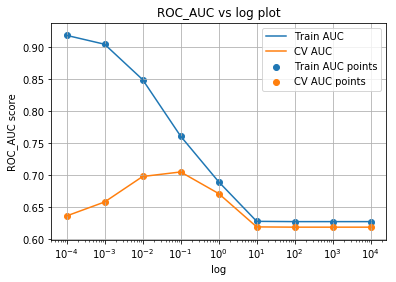

In [85]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import *
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
# hyperparameter tuning with l2 reg
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_bow, y_train)

train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()

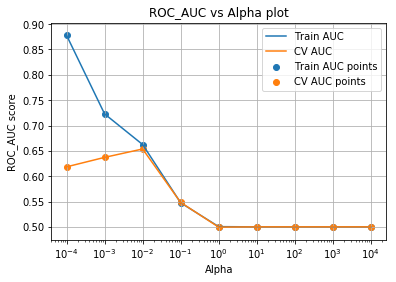

In [86]:
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")


parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_bow, y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

observation:  l2 regualization is doing better than l1 regularization

# fitting_best_alpha_hyper_parameter_to_the_model¶

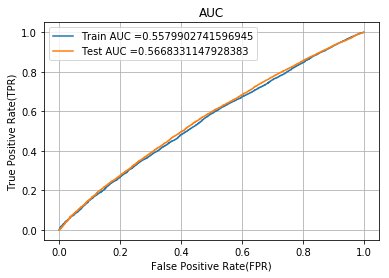

In [87]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_bow = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 10)
Classifier_bow.fit(X_tr_bow ,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = Classifier_bow.decision_function(X_tr_bow)
y_test_pred = Classifier_bow.decision_function(X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [88]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.99


Text(0.5,1,'Test Confusion Matix')

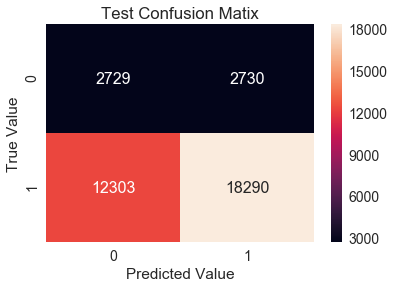

In [89]:
import seaborn as sea
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, te_thresholds,test_fpr,test_fpr)),range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.01


Text(0.5,1,'Train Confusion Matix')

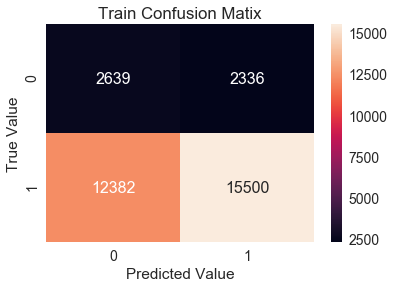

In [90]:
import seaborn as sea
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, te_thresholds,train_fpr,train_fpr)),range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

# Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [91]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
X_tr_tfidf = hstack((X_train_tf_essay,X_train_tf_title,X_train_teacher_prefix,X_train_cat,X_train_subcat,X_train_project_grade_category,X_train_school_state,train_qnty_standar,train_price_standar,train_prev_proj_standar))

X_cv_tfidf = hstack((X_cv_tf_essay,X_cv_tf_title,X_cv_teacher_prefix,X_cv_cat,X_cv_subcat,X_cv_project_grade_category,X_cv_school_state,cv_qnty_standar,cv_price_standar,cv_prev_proj_standar))

X_test_tfidf = hstack((X_test_tf_essay,X_test_tf_title,X_test_teacher_prefix,X_test_cat,X_test_subcat,X_test_project_grade_category,X_test_school_state,test_qnty_standar,test_price_standar,test_prev_proj_standar))
print(X_cv_tfidf.shape, y_cv.shape)
print(X_tr_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)


(16184, 7380) (16184,)
(32857, 7380) (32857,)
(36052, 7380) (36052,)


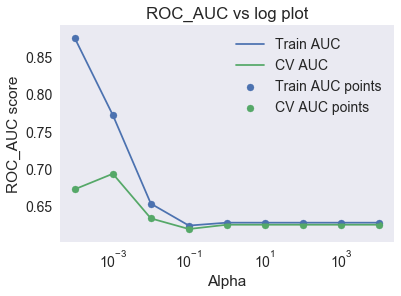

In [92]:
#BY USING L2 REGULARISER
# hyperparameter tuning with l2 reg
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import *
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_tfidf, y_train)

train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()

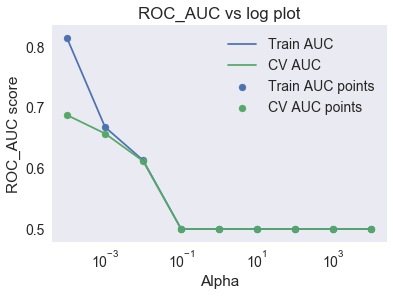

In [93]:
# hyperparameter tuning with l1 reg reduce the alpha values in list
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_tfidf, y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()

# fitting_best_alpha_hyper_parameter_to_the_model¶

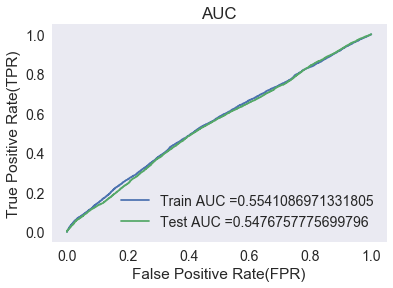

In [94]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_tfidf = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1)
Classifier_tfidf.fit(X_tr_tfidf ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = Classifier_tfidf.decision_function(X_tr_tfidf)
y_test_pred = Classifier_tfidf.decision_function(X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [95]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.53


Text(0.5,1,'Test Confusion Matix')

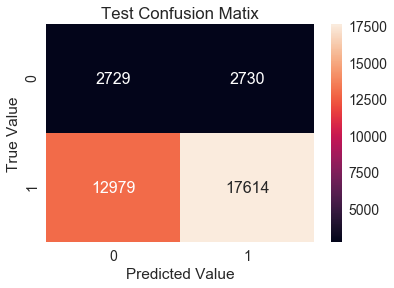

In [96]:
#CONFUSION MATRIX
import seaborn as sea
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,te_thresholds,test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.56


Text(0.5,1,'Train Confusion Matix')

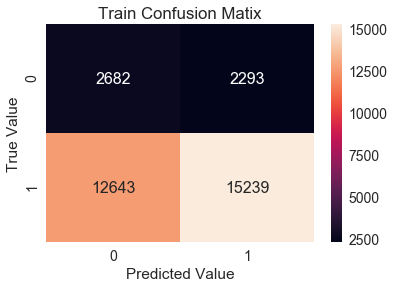

In [97]:
import seaborn as sea
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,te_thresholds,train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

# Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [98]:
from scipy.sparse import hstack
import numpy
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
X_tr_w2v = hstack((essay_avg_w2v,title_avg_w2v,train_prev_proj_standar,train_price_standar,train_qnty_standar, X_train_teacher_prefix,X_train_cat,X_train_subcat, X_train_project_grade_category,X_train_school_state))
X_cv_w2v =hstack((essay_cv_avg_w2v,title_cv_avg_w2v,cv_prev_proj_standar,cv_price_standar,cv_qnty_standar,X_cv_teacher_prefix,X_cv_cat,X_cv_subcat,X_cv_project_grade_category,X_cv_school_state))
X_test_w2v =hstack((essay_test_avg_w2v,title_test_avg_w2v,test_prev_proj_standar,test_price_standar,test_qnty_standar,X_test_teacher_prefix,X_test_cat,X_test_subcat,X_test_project_grade_category,X_test_school_state))

print(X_tr_w2v.shape, y_train.shape)
print(X_test_w2v.shape, y_test.shape)
print(X_cv_w2v.shape, y_cv.shape)

(32857, 203) (32857,)
(36052, 203) (36052,)
(16184, 203) (16184,)


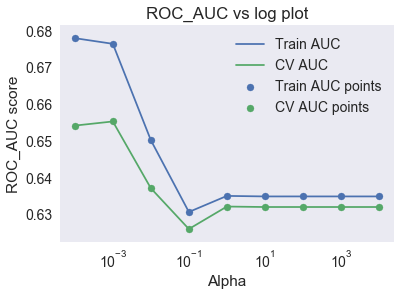

In [99]:
#BY USING "L2" REGULARISER
# hyperparameter tuning with l2 reg
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')

classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_w2v, y_train)

train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()

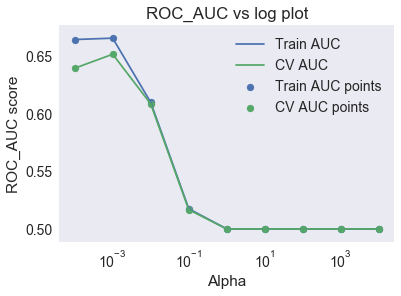

In [100]:
#BY USING "L1" REGULARISER
# hyperparameter tuning with l2 reg
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')

classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_w2v, y_train)

train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()

# fitting_best_alpha_hyper_parameter_to_the_model¶

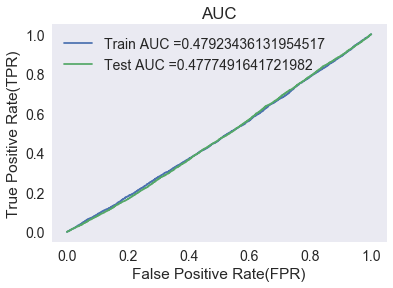

In [101]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc
Classifier_w2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1)
Classifier_w2v.fit(X_tr_w2v ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = Classifier_w2v.decision_function(X_tr_w2v)
y_test_pred = Classifier_w2v.decision_function(X_test_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.04


Text(0.5,1,'Test Confusion Matix')

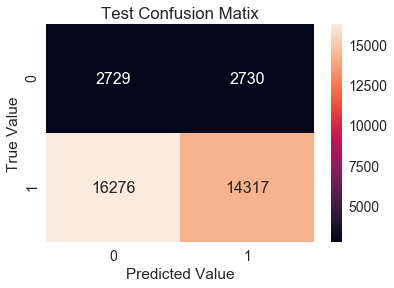

In [102]:
#CONFUSION MATRIX
import seaborn as sea
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,te_thresholds,test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.05


Text(0.5,1,'Train Confusion Matix')

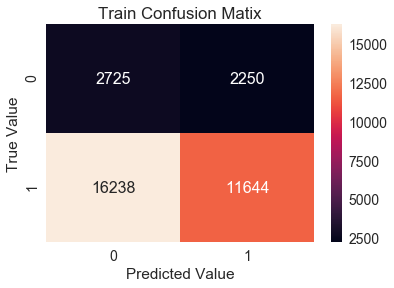

In [103]:
#CONFUSION MATRIX
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,te_thresholds,train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

# Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

In [104]:
X_tr_avg_tfidf_w2v =hstack((essay_train_tfidf_w2v_vectors, title_tfidf_w2v_vectors,train_prev_proj_standar,train_price_standar,train_qnty_standar,X_train_teacher_prefix,X_train_cat,X_train_subcat,X_train_project_grade_category,X_train_school_state))
X_cv_avg_tfidf_w2v =hstack((essay_cv_tfidf_w2v_vectors,title_cv_tfidf_w2v_vectors,cv_prev_proj_standar,cv_price_standar,cv_qnty_standar,X_cv_teacher_prefix,X_cv_cat,X_cv_subcat,X_cv_project_grade_category,X_cv_school_state))
X_test_avg_tfidf_w2v = hstack((essay_test_tfidf_w2v_vectors,title_test_tfidf_w2v_vectors,test_prev_proj_standar,test_price_standar,test_qnty_standar,X_test_teacher_prefix,X_test_cat,X_test_subcat,X_test_project_grade_category,X_test_school_state))



print(X_tr_avg_tfidf_w2v.shape, y_test.shape)
print(X_test_avg_tfidf_w2v.shape, y_train.shape)
print(X_cv_avg_tfidf_w2v.shape, y_cv.shape)

(32857, 703) (36052,)
(36052, 703) (32857,)
(16184, 703) (16184,)


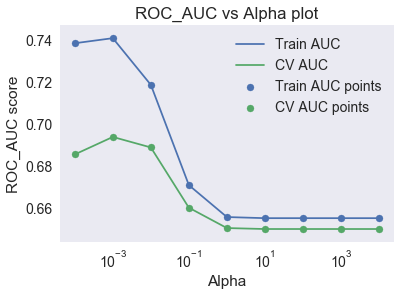

In [105]:
#l2 REGULARISER

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced',)

classifier = GridSearchCV(SV, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_avg_tfidf_w2v, y_train)

train_auc= classifier.cv_results_['mean_train_score']
cv_auc = classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

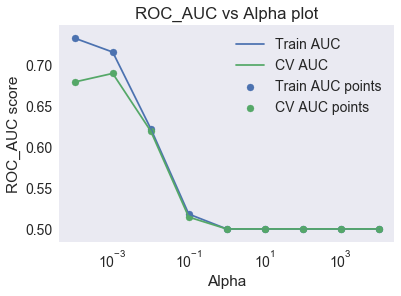

In [106]:
#L1 REGULARIZER

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')

classifier = GridSearchCV(SV, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_avg_tfidf_w2v, y_train)

train_auc= classifier.cv_results_['mean_train_score']
cv_auc = classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

# fitting_best_alpha_hyper_parameter_to_the_model¶

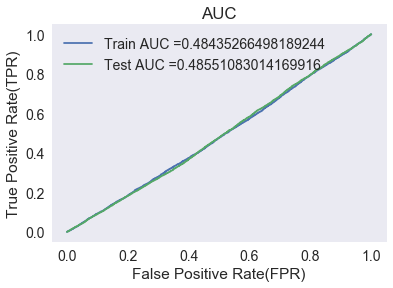

In [107]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_tfidf_w2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1)
Classifier_tfidf_w2v.fit(X_tr_avg_tfidf_w2v ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = Classifier_tfidf_w2v.decision_function(X_tr_avg_tfidf_w2v)
y_test_pred = Classifier_tfidf_w2v.decision_function(X_test_avg_tfidf_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.06


Text(0.5,1,'Test Confusion Matix')

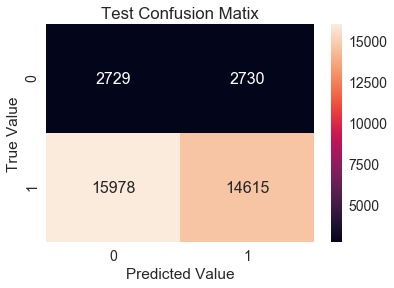

In [108]:
#CONFUSION MATRIX
import seaborn as sea
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,te_thresholds,test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.06


Text(0.5,1,'Train Confusion Matix')

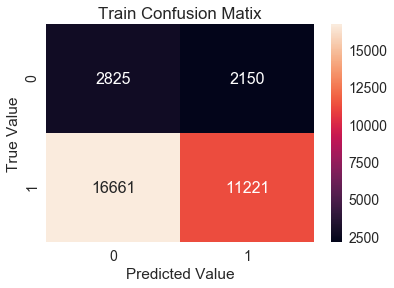

In [109]:
#CONFUSION MATRIX
import seaborn as sea
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,te_thresholds,train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

In [111]:
# numbe of words in title andnumber of wo essay
train_word_count_essay = []
train_word_count_title = []
cv_word_count_essay = []
cv_word_count_title = []
test_word_count_essay = []
test_word_count_title = []

# training data
for title, essay in tqdm(zip(X_train_title, X_train_essay)):
  train_word_count_title.append(len(title.split()))
  train_word_count_essay.append(len(essay.split()))

train_word_count_title = np.array(train_word_count_title).reshape(-1,1)
train_word_count_essay = np.array(train_word_count_essay).reshape(-1,1)

# cross validation data
for title, essay in tqdm(zip(X_cv_title, X_cv_essay)):
  cv_word_count_title.append(len(title.split()))
  cv_word_count_essay.append(len(essay.split()))
  
cv_word_count_title = np.array(cv_word_count_title).reshape(-1,1)
cv_word_count_essay = np.array(cv_word_count_essay).reshape(-1,1)
  
# test data
for title, essay in tqdm(zip(X_test_title, X_test_essay)):
  test_word_count_title.append(len(title.split()))
  test_word_count_essay.append(len(essay.split()))
  
test_word_count_title = np.array(test_word_count_title).reshape(-1,1)
test_word_count_essay = np.array(test_word_count_essay).reshape(-1,1)

32857it [00:00, 66429.34it/s]
16184it [00:00, 45880.19it/s]
36052it [00:00, 48459.32it/s]


In [112]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [113]:
# sentiment polarity
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sentiment_neg = []
sentiment_pos = []
sentiment_neu = []
sentiment_compound = []

# training data
for sentence in tqdm(X_train_essay):
  ss = sid.polarity_scores(sentence)
  sentiment_neg.append(ss['neg'])
  sentiment_pos.append(ss['pos'])
  sentiment_neu.append(ss['neu'])
  sentiment_compound.append(ss['compound'])

sentiment_neg = np.array(sentiment_neg).reshape(-1,1)
sentiment_pos = np.array(sentiment_pos).reshape(-1,1)
sentiment_neu = np.array(sentiment_neu).reshape(-1,1)
sentiment_compound = np.array(sentiment_compound).reshape(-1,1)

# cross validation
cv_sentiment_neg = []
cv_sentiment_pos = []
cv_sentiment_neu = []
cv_sentiment_compound = []

for sentence in tqdm(X_cv_essay):
  ss = sid.polarity_scores(sentence)
  cv_sentiment_neg.append(ss['neg'])
  cv_sentiment_pos.append(ss['pos'])
  cv_sentiment_neu.append(ss['neu'])
  cv_sentiment_compound.append(ss['compound'])
  
cv_sentiment_neg = np.array(cv_sentiment_neg).reshape(-1,1)
cv_sentiment_pos = np.array(cv_sentiment_pos).reshape(-1,1)
cv_sentiment_neu = np.array(cv_sentiment_neu).reshape(-1,1)
cv_sentiment_compound = np.array(cv_sentiment_compound).reshape(-1,1)

# test data
test_sentiment_neg = []
test_sentiment_pos = []
test_sentiment_neu = []
test_sentiment_compound = []

for sentence in tqdm(X_test_essay):
  ss = sid.polarity_scores(sentence)
  test_sentiment_neg.append(ss['neg'])
  test_sentiment_pos.append(ss['pos'])
  test_sentiment_neu.append(ss['neu'])
  test_sentiment_compound.append(ss['compound'])

test_sentiment_neg = np.array(test_sentiment_neg).reshape(-1,1)
test_sentiment_pos = np.array(test_sentiment_pos).reshape(-1,1)
test_sentiment_neu = np.array(test_sentiment_neu).reshape(-1,1)
test_sentiment_compound = np.array(test_sentiment_compound).reshape(-1,1)

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:58<00:00, 305.35it/s]


In [114]:
#taking low low points for dimentionality reduction
X_train_tf_essay=X_train_tf_essay[:,0:4000]
X_cv_tf_essay=X_cv_tf_essay[:,0:4000]
X_test_tf_essay=X_test_tf_essay[:,0:4000]
from sklearn.decomposition import TruncatedSVD
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#declaring index as Dimensions in train_text_tfidf
Di = [25,50,100,200,500,1500,2000,2500]
Varience_sum = []
for i in tqdm(Di):
    svd = TruncatedSVD(n_components = i, random_state = 42)
    svd.fit(X_train_tf_essay)
    Varience_sum.append(svd.explained_variance_ratio_.sum())

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [08:26<00:00, 112.49s/it]


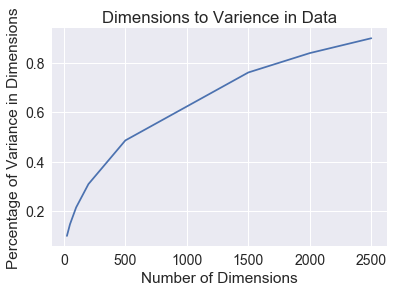

In [115]:
plt.xlabel("Number of Dimensions")
plt.ylabel("Percentage of Variance in Dimensions")
plt.title("Dimensions to Varience in Data")
plt.plot(Di,Varience_sum)
plt.show()

In [116]:
svd = TruncatedSVD(n_components= 2000)
svd.fit(X_train_tf_essay)
#Transforms:
#Train SVD
X_train_tf_essay= svd.transform(X_train_tf_essay )
#Test SVD
X_test_tf_essay = svd.transform(X_test_tf_essay )
#CV SVD
X_cv_tf_essay =  svd.transform(X_cv_tf_essay )

# 2.5 Support Vector Machines with added Features Set 5 ¶

In [117]:
# combine all
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr_svd = hstack((X_train_teacher_prefix,X_train_cat,X_train_subcat,X_train_project_grade_category,X_train_school_state,train_qnty_standar,train_price_standar,train_prev_proj_standar,train_word_count_essay,train_word_count_title,sentiment_pos,sentiment_neg,sentiment_compound))
X_test_svd = hstack((X_test_teacher_prefix,X_test_cat,X_test_subcat ,X_test_project_grade_category,X_test_school_state,test_qnty_standar,test_price_standar,test_prev_proj_standar,test_word_count_essay,test_word_count_title,test_sentiment_pos,test_sentiment_neg ,test_sentiment_compound))

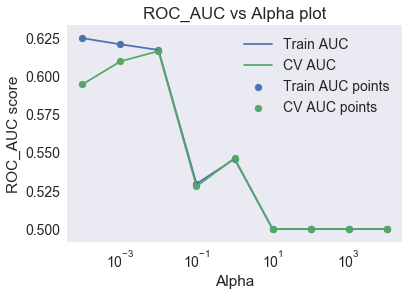

In [118]:
#by l1 regularization
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#from sklearn.datasets import *
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm

# hyperparameter tuning with l2 reg
#we are using L1 Regularizer
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced',)
classifier = GridSearchCV(SV, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_svd, y_train)

train_auc= classifier.cv_results_['mean_train_score']
cv_auc = classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

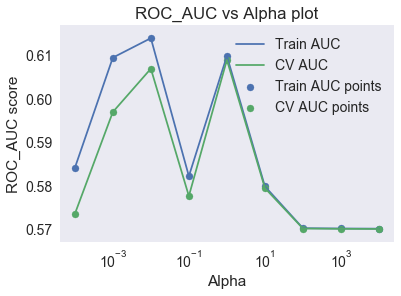

In [119]:
#BY USING L2 REGULARISER

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced',)
classifier = GridSearchCV(SV, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_svd, y_train)

train_auc= classifier.cv_results_['mean_train_score']
cv_auc = classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

# fitting_best_alpha_hyper_parameter_to_the_model

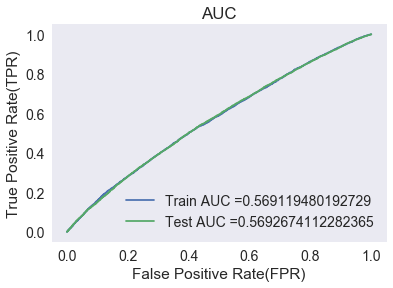

In [120]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_n = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 10**3)
Classifier_n.fit(X_tr_svd ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = Classifier_n.decision_function(X_tr_svd)
y_test_pred = Classifier_n.decision_function(X_test_svd)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.05


Text(0.5,1,'Test Confusion Matix')

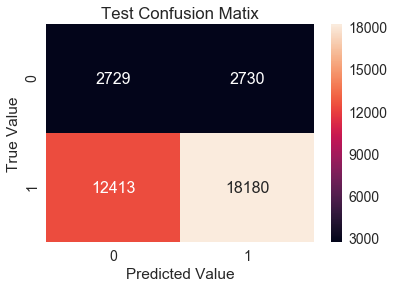

In [121]:
#Confusion_matrix
import seaborn as sea
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,te_thresholds,test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

the maximum value of tpr*(1-fpr) 0.25 for threshold 1.08


Text(0.5,1,'Train Confusion Matix')

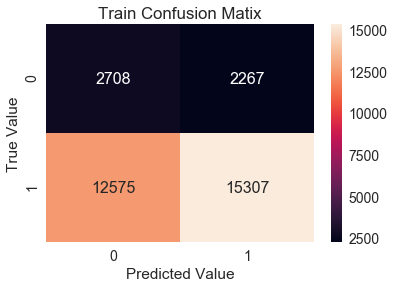

In [122]:
import seaborn as sea
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,te_thresholds,train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

<h1>3. Conclusion</h1>

In [124]:
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Vectorizer", " Alpha ", " Test_AUC ")
tb.add_row(["BOW ", 10,0.558])
tb.add_row(["TfIdf ", 1, 0.545])
tb.add_row(["AVG_W2V", 1, 0.473])
tb.add_row(["AVG_TfIdf", 1, 0.481])
tb.add_row(["SVD_Top_2000_Features", 10**3, 0.566])
print(tb.get_string(titles = "SVM_Observations"))

+-----------------------+---------+------------+
|       Vectorizer      |  Alpha  |  Test_AUC  |
+-----------------------+---------+------------+
|          BOW          |    10   |   0.558    |
|         TfIdf         |    1    |   0.545    |
|        AVG_W2V        |    1    |   0.473    |
|       AVG_TfIdf       |    1    |   0.481    |
| SVD_Top_2000_Features |   1000  |   0.566    |
+-----------------------+---------+------------+
